# 2008 Eruption of Okmok Volcano

GR6901: Research Computing Final Project

Daniel Lee

## Research Question
Is there any evidence for a deep trigger to the 2008 eruption of Okmok Volcano? 

## Motivation
The 2008 eruption of Okmok was the largest eruption in the Aleutians since 1992. This eruption had limited precursory unrest but led to an extremely large explosive eruption, which ejected ash particles into the stratosphere. The lack of warning prior to a large eruption poses risks for regional air traffic and locals nearby, therefore a post-eruptive analysis is crucial to understanding the lead up to this eruption. Using geochemical data and geophysical data, I aim to reconstruct the events that led up to the 2008 eruption with hope of shedding new light to these kinds of 'silent' but explosive eruptions.

In [131]:
# Importing Packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

In [246]:
sns.set_theme(style='ticks')
df=pd.read_csv('bubble-vol.csv')
dg=pd.read_csv('volatiles-mine.csv').fillna(value=0)
dh=pd.read_csv('isobar-rh22.csv')
di=pd.read_csv('glass-this-study.csv')
dj=pd.read_csv('majorelement-all.csv')
dk=pd.read_csv('fo-olivine-zoning.csv')

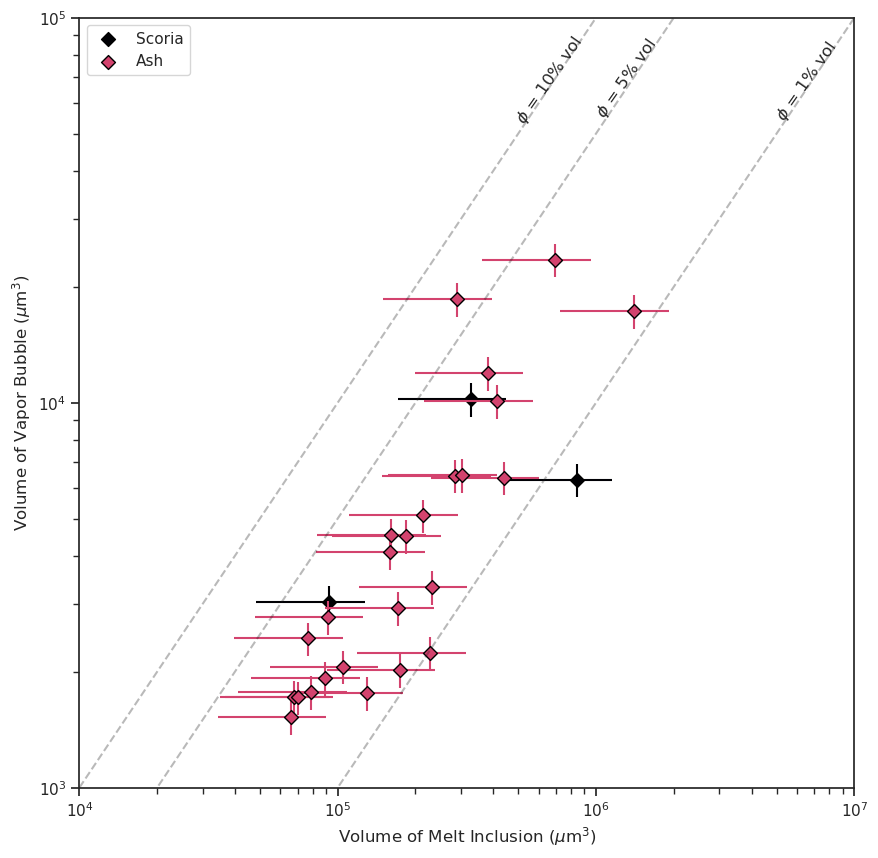

In [243]:
colors={'Scoria':'#000004FF', 'Ash':'#D3436EFF'}

f,ax=plt.subplots(figsize=(10,10))

linevalue=np.logspace(4,7,50)

ax.plot(linevalue,linevalue*0.01,'--',color='k',alpha=0.3)
ax.annotate(xy=(linevalue[-4],linevalue[-4]*0.01), xytext=(-25,5), textcoords='offset points', text='$\phi$ = 1% vol', va='center',rotation=55)
ax.plot(linevalue,linevalue*0.05,'--',color='k',alpha=0.3)
ax.annotate(xy=(linevalue[-15],linevalue[-15]*0.05), xytext=(-29,0), textcoords='offset points', text='$\phi$ = 5% vol', va='center',rotation=55)
ax.plot(linevalue,linevalue*0.10,'--',color='k',alpha=0.3)
ax.annotate(xy=(linevalue[-20],linevalue[-20]*0.1), xytext=(-30,0), textcoords='offset points', text='$\phi$ = 10% vol', va='center',rotation=55)

for category, color in colors.items():
    df_category=df[df['Key']==category]
    ax.errorbar(x=df_category['Volume-MI'],y=df_category['Volume-Bubble'],yerr=[df_category['Volume-Bubble']*0.1,df_category['Volume-Bubble']*0.1],xerr=[df_category['Volume-MI']*0.48,df_category['Volume-MI']*0.37],fmt='None',color=color,zorder=1)
    ax.scatter(df_category['Volume-MI'],df_category['Volume-Bubble'],marker='D',c=color,label=category,edgecolors='black',s=50)

ax.set_xlabel('Volume of Melt Inclusion ($\mu$m$^3$)')
ax.set_ylabel('Volume of Vapor Bubble ($\mu$m$^3$)')
ax.set_xscale('log')
ax.set_xlim([1e4,1e7])
ax.set_ylim([1e3,1e5])
ax.set_yscale('log')
ax.legend()



/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

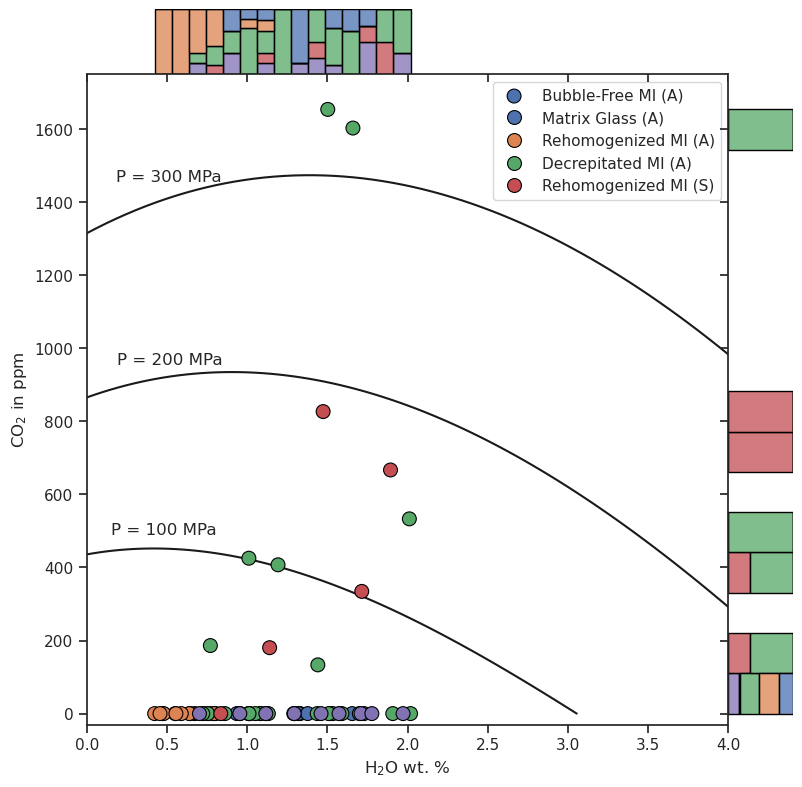

In [310]:

sns.set_style("ticks", {'axes.grid' : False})

cubic_interpolation_model = interp1d(dh['H2O_liq_1000'], dh['CO2_liq_1000']*10000, kind = "cubic")
cubic_interpolation_model2 = interp1d(dh['H2O_liq_2000'], dh['CO2_liq_2000']*10000, kind = "cubic")
cubic_interpolation_model3 = interp1d(dh['H2O_liq_3000'], dh['CO2_liq_3000']*10000, kind = "cubic")
cubic_interpolation_model4 = interp1d(dh['H2O_liq_4000'], dh['CO2_liq_4000']*10000, kind = "cubic")

X_=np.linspace(0,dh['H2O_liq_1000'].max(),100)
Y_=cubic_interpolation_model(X_)
X_2=np.linspace(0,dh['H2O_liq_2000'].max(),100)
Y_2=cubic_interpolation_model2(X_2)
X_3=np.linspace(0,dh['H2O_liq_3000'].max(),100)
Y_3=cubic_interpolation_model3(X_3)
X_4=np.linspace(0,dh['H2O_liq_4000'].max(),100)
Y_4=cubic_interpolation_model4(X_4)

colors={'Scoria':'#000004FF', 'Ash':'#D3436EFF'}
mitype={'BF':'<','RH':'D','RH-Decap':'X','MG':'o'}


g = sns.JointGrid(data=dg, x="H2O", y="CO2",space=0,ratio=10,height=8)
g.ax_joint.set_xlim(0,4)
g.ax_joint.set_ylim(-30,1750)
g.plot_joint(sns.scatterplot,hue=dg["Code"],edgecolor='black',s=100)
g.plot_marginals(sns.histplot,hue=dg["Code"],multiple='fill',bins=15,edgecolor='black')

#g=sns.jointplot(x=dg['H2O'],y=dg['CO2'],hue=dg['Code'],marker='*',edgecolors='k', marginal_kws={'fill':True,'multiple':'stack','common_norm':False})
g.ax_joint.plot(X_,Y_,color='k',zorder=0)
g.ax_joint.plot(X_2,Y_2,color='k',zorder=0)
g.ax_joint.plot(X_3,Y_3,color='k',zorder=0)
g.ax_joint.plot(X_4,Y_4,color='k',zorder=0)


#custom_legend=[Line2D([0], [0], marker='o', color='w', label='Ash-Matrix Glass', markerfacecolor='#D3436EFF',markeredgecolor='k', markersize=10),
#               Line2D([0], [0], marker='^', color='w', label='Ash-MI', markerfacecolor='#D3436EFF',markeredgecolor='k', markersize=8),
#               Line2D([0], [0], marker='<', color='w', label='Scoria-Bubble Free', markerfacecolor='#000004FF',markeredgecolor='k', markersize=8),
#               Line2D([0], [0], marker='<', color='w', label='Ash-Bubble Free', markerfacecolor='#D3436EFF',markeredgecolor='k', markersize=8),
#               Line2D([0], [0], marker='D', color='w', label='Ash-Rehomogenized', markerfacecolor='#D3436EFF',markeredgecolor='k', markersize=8),
#               Line2D([0], [0], marker='D', color='w', label='Scoria-Rehomogenized', markerfacecolor='#000004FF',markeredgecolor='k', markersize=8),
#               Line2D([0], [0], marker='X', color='w', label='Ash-Rehomogenized Decrepitated', markerfacecolor='#D3436EFF',markeredgecolor='k', markersize=8)]

g.ax_joint.annotate(xy=(X_[5],Y_[5]), xytext=(0,15), textcoords='offset points', text='P = 100 MPa', va='center',rotation=0)
g.ax_joint.annotate(xy=(X_2[4],Y_2[4]), xytext=(0,20), textcoords='offset points', text='P = 200 MPa', va='center',rotation=0)
g.ax_joint.annotate(xy=(X_3[3],Y_3[3]), xytext=(0,30), textcoords='offset points', text='P = 300 MPa', va='center',rotation=0)

#g.ax_joint.legend(handles=custom_legend,loc='upper right')
#g.ax_joint.margins(x=0,y=0)

g.ax_joint.set_xlabel('H$_2$O wt. %')
g.ax_joint.set_ylabel('CO$_2$ in ppm')
g.ax_joint.legend(['Bubble-Free MI (A)','Matrix Glass (A)','Rehomogenized MI (A)','Decrepitated MI (A)','Rehomogenized MI (S)'],loc="upper right",title='')

#g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
#sns.kdeplot(iris["sepal_width"], color="b", shade=True, bw=0.1, ax=g.ax_marg_x)
#sns.kdeplot(iris["petal_length"], color="r", shade=True, bw=0.01, vertical=True, ax=g.ax_marg_y)

/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

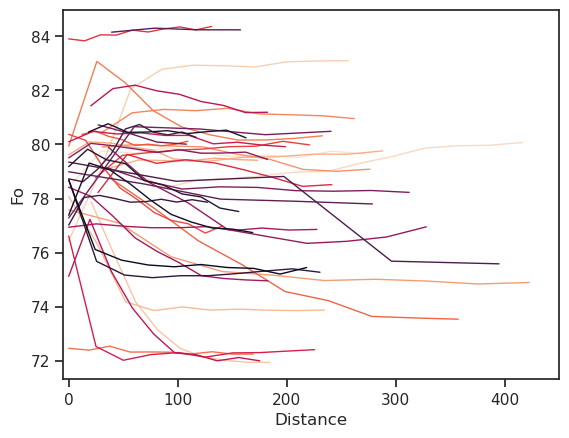

In [300]:
sns.set_style("ticks", {'axes.grid' : False})
g=sns.lineplot(data=dk,x='Distance',y='Fo',hue='Comment',palette="rocket_r", lw=1)
plt.xlim([-5,450])
g.get_legend().set_visible(False)

/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

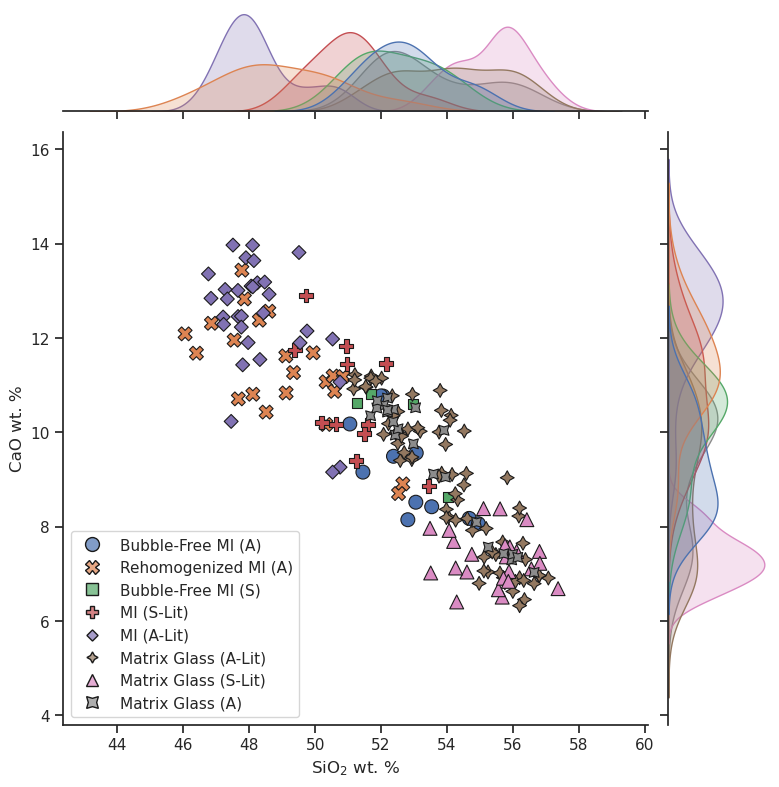

In [314]:

g=sns.jointplot(x=dj['SIO2'],y=dj['CAO'],hue=dj['Code'],marginal_kws=dict(common_norm=False),height =8)
#Clear the axes containing the scatter plot
g.ax_joint.cla()

marker=['o','+','^','s','x','p','*','<']
sns.scatterplot(x=dj['SIO2'],y=dj['CAO'],hue=dj['Code'], markers=True,style=dj['Code'],edgecolor='k',s=100)

plt.xlabel('SiO$_2$ wt. %')
plt.ylabel('CaO wt. %')

custom_legend=[Line2D([0], [0], marker='o', color='w', label='Bubble-Free MI (A)', markerfacecolor='#819CC7',markeredgecolor='k', markersize=10),
               Line2D([0], [0], marker='X', color='w', label='Rehomogenized MI (A)', markerfacecolor='#E7A885',markeredgecolor='k', markersize=10),
               Line2D([0], [0], marker='s', color='w', label='Bubble-Free MI (S)', markerfacecolor='#87C295',markeredgecolor='k', markersize=8),
               Line2D([0], [0], marker='P', color='w', label='MI (S-Lit)', markerfacecolor='#D58385',markeredgecolor='k', markersize=8),
               Line2D([0], [0], marker=(4,0,0), color='w', label='MI (A-Lit)', markerfacecolor='#A69CC9',markeredgecolor='k', markersize=8),
               Line2D([0], [0], marker=(4,1,0), color='w', label='Matrix Glass (A-Lit)', markerfacecolor='#B3A08F',markeredgecolor='k', markersize=8),
               Line2D([0], [0], marker='^', color='w', label='Matrix Glass (S-Lit)', markerfacecolor='#E5ADD4',markeredgecolor='k', markersize=8),
               Line2D([0], [0], marker=(4,1,45), color='w', label='Matrix Glass (A)', markerfacecolor='#AEAEAE',markeredgecolor='k', markersize=12)]
plt.legend(['','Bubble-Free MI (A)','Rehomogenized MI (A)', 'Bubble-Free MI (S)','MI (S-Lit)','MI (A-Lit)','Matrix Glass (A-Lit)','Matrix Glass (S-Lit)','Matrix Glass (A)'],title='')
plt.legend(handles=custom_legend,loc='lower left')

In [362]:
idx=dk.groupby('Comment')['Distance'].idxmax()
datcore=dk.loc[idx, ['Comment', 'Distance', 'Fo']]
datcore

idx=dk.groupby('Comment')['Distance'].idxmin()
datrim=dk.loc[idx, ['Comment', 'Distance', 'Fo']]
datrim


c=datcore.Fo.mean()
c1=datcore.Fo.min()
c2=datcore.Fo.max()
r=datrim.Fo.mean()
r1=datrim.Fo.min()
r2=datrim.Fo.max()



71.93713922


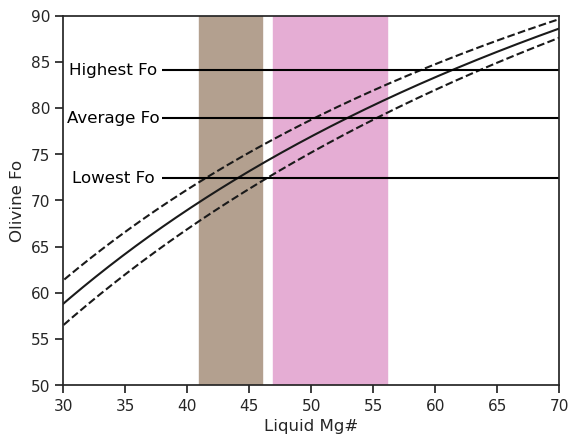

In [360]:
mg_liq=np.linspace(0.01,0.999,1000)
xmg=np.ones(1000)
xfe=(xmg-(xmg*mg_liq))/mg_liq
mgfeliq=xmg/xfe

mgfeol30=mgfeliq/0.3
xfeol30=xmg/mgfeol30
fo30=xmg/(xmg+xfeol30)

mgfeol27=mgfeliq/0.27
xfeol27=xmg/mgfeol27
fo27=xmg/(xmg+xfeol27)

mgfeol33=mgfeliq/0.33
xfeol33=xmg/mgfeol33
fo33=xmg/(xmg+xfeol33)



plt.plot(mg_liq*100,fo30*100,color='k')
plt.plot(mg_liq*100,fo27*100,'--',color='k')
plt.plot(mg_liq*100,fo33*100,'--',color='k')
plt.xlabel('Liquid Mg#')
plt.ylabel('Olivine Fo')
plt.xlim([30,70])
plt.ylim([50,90])


free=di[di['CodeNo']=='Free']
ol=di[di['CodeNo']=='Cry']

plt.fill_between([min(ol['Mg#'])*100,max(ol['Mg#']*100)],y1=0,y2=90,color='#E5ADD4')
plt.fill_between([min(free['Mg#'])*100,max(free['Mg#'])*100],y1=0,y2=90,color='#B3A08F')
sns.set_style("ticks")

plt.hlines(r1,xmin=38,xmax=70,color='black')
plt.text(34, r1, 'Lowest Fo', ha='center', va='center',color='black')
plt.text(34, r, 'Average Fo', ha='center', va='center',color='black')
plt.text(34, r2, 'Highest Fo', ha='center', va='center',color='black')
plt.hlines(r,xmin=38,xmax=70,color='black')
plt.hlines(r2,xmin=38,xmax=70,color='black')


## Discussion and Results
Here, I present geochemical data from olivine, melt inclusions and matrix glasses. 

#### Quality of data
To verify the quality of the melt inclusions used in this analysis, I look at the volume of the melt inclusion proportion of the vapor bubble. The ratio between both volumes mostly fall between 1-5% and are considered to not be compromised.

#### Evidence for a deep magma source
These melt inclusions and matrix glasses are measured for their volatile data. Water and CO2 data can be converted to pressure (depth) using their solubility. Within the population of melt inclusions, majority of the melt inclusions have no CO2, but there are a small population of high CO2 at around ~1600 ppm and some at around 300-700ppm. This suggest that some magma from this eruption came from a deeper source around 12 km in depth. However, this does not show that the input was just before the eruption.

#### Timescales in crystals
I subsequently plot the Fo content in olivine crystals to see if there is a change in magma composition from the crystal rim to core. The change in chemical composition in the crystal can be used in tandem with chemical diffusion to understand the residence time of the crystal in a different magma composition. As plotted, there are different zonation patterns on the melt inclusions and different Fo contents. In particular, the Fo at 84 with no zonation suggests that the crystal was residing in a deeper reservior and had limited (time) interaction with a shallower reservior before the eruption. Therefore, suggesting a deep trigger.

#### Geochemical Plot

I plotted the composition of melt inclusion and matrix glass data from the literature and those collected in this study. Some of the melt inclusion data have SiO2 contents that are significantly lower than the matrix glass (composition of the magma after it erupts). This re-emphasize a deeper reservior.
I also plotted the equilibrium composition of the matrix glass to the Fo of olivine crystal. Thus, a magma of a specific composition will crystalize olivine of a specific Fo content. In brown and pink are the composition of the two matrix glass population measured. Therefore, Fo 84 olivine was not in equilibirum with the magma and supports the idea of a deep trigger.

